## INTRODUCTION

• Below is the twitter archive dataset for @dog_rates, which is also known as WeRateDogs. This dataset will be wrangled,analyzed and visualized. WeRateDogs is where dogs are rated with different types of feedback. There are over 5000+ of their tweets. The text column was used to extract dog names, ratings and dog stages. The tweets have been filtered for tweets with ratings only. In the WeRateDogs twitter archive, images were run throgh neural network, in this dataset, we will be gathering Retweet counts and Favorite counts.

## Table Of Content

• Gathering Data
• Assessing Data
• Cleaning Data
• Storing Data
• Data Analysis and visualization

In [172]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [205]:
#importing Enhanced Twitter Archive
df = pd.read_csv('twitter-archive-enhanced-2.csv') 

In [206]:
tsv_data = pd.read_csv('image-predictions-3.tsv', sep='\t')

In [207]:
# Downloading Twitter image predictions
url = "https://video.udacity-data.com/topher/2018/November/5bf60c69_image-predictions-3/image-predictions-3.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [208]:
# importing required libraries
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Getting tweet data from Twitter API
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df.tweet_id.values
len(tweet_ids)


2356

In [209]:
# converting the txt file to data lisr where each element (line) contains one piece of twitter info
df_list = []

with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [210]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [212]:
# Dataframe from previous list that contains id, retweet count and favorite count is created below
tweet_data = pd.DataFrame(df_list, columns = ['id',
                                             'retweet_count',
                                             'favorite_count'])

In [213]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [214]:
# The name of the id column is changed to tweet_id
tweet_data = tweet_data.rename(columns = {'id':'tweet_id'})
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [187]:
# The dataframe file is saved as csv for future use
tweet_data.to_csv('tweet_data.csv', index=False)

In [215]:
# This is to check is the file was saved correctly
x = pd.read_csv('tweet_data.csv')
x.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data

In [190]:
## Programmaticalliy and visually assessing data for quality and tidiness issues
## programmatic assessment, using code to view specific portions and summaries of data.
## visual assessment scrolling through the data on your preferred software application.
## Tidiness: issues that prevent easy analysis. untidity data is also known as messy data.
## Tidy requirements: Each variable forms a column. Each observation forms a row. Each type of observational unit forma a table
## Quality: issues with content. low quality data is also known as dity data

## Assessing Enhanced Twitter Archive Data

In [216]:
df = pd.read_csv('twitter-archive-enhanced-2.csv')

In [217]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [218]:
df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [188]:
# Checking which Ids have numerators with less than 10
df[df.rating_numerator <10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [219]:
# Checking rating_numerator of tweet_id
df.loc[(df.tweet_id == 666337882303524864), 'rating_numerator']

2333    9
Name: rating_numerator, dtype: int64

In [97]:
# Checking text of tweet id using the number of the row
df.loc[2333, 'text']

'This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL'

In [98]:
df.rating_denominator.describe()
# some denominators have a zero value

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [100]:
# Checking which IDs have denominators with a zero value
df[df.rating_denominator == 0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [192]:
df.loc[313, 'text']
# it looks like someone was trying to correct @jonnysun

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [103]:
df[df.rating_denominator != 10].count()[0]

23

In [104]:
df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [105]:
i_predictions = pd.read_csv('image-predictions.tsv', sep= '\t')
i_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [106]:
i_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1317,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,web_site,0.906673,False,printer,0.008600,False,carton,0.004533,False
1177,737800304142471168,https://pbs.twimg.com/media/Cj0xdMBVAAEbDHp.jpg,1,malamute,0.374682,True,Norwegian_elkhound,0.334853,True,limousine,0.068173,False
1265,749317047558017024,https://pbs.twimg.com/ext_tw_video_thumb/74931...,1,wire-haired_fox_terrier,0.155144,True,Lakeland_terrier,0.108382,True,buckeye,0.074617,False
1815,833826103416520705,https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg,1,Chihuahua,0.438054,True,kelpie,0.149706,True,Pembroke,0.096480,True
31,666421158376562688,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,1,Blenheim_spaniel,0.906777,True,cocker_spaniel,0.090346,True,Shih-Tzu,0.001117,True
332,672139350159835138,https://pbs.twimg.com/media/CVPrLE2WwAELCxD.jpg,1,Rottweiler,0.290992,True,American_black_bear,0.238120,False,chimpanzee,0.115541,False
1242,747204161125646336,https://pbs.twimg.com/media/Cl6aOBhWEAALuti.jpg,2,coil,0.533699,False,dugong,0.087959,False,rain_barrel,0.039221,False
481,675362609739206656,https://pbs.twimg.com/media/CV9etctWUAAl5Hp.jpg,1,Labrador_retriever,0.479008,True,ice_bear,0.218289,False,kuvasz,0.139911,True
1780,828650029636317184,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1,golden_retriever,0.649209,True,Chesapeake_Bay_retriever,0.198560,True,vizsla,0.056200,True
239,670435821946826752,https://pbs.twimg.com/media/CU3d0azWUAA38FD.jpg,1,sorrel,0.460370,False,basenji,0.135767,True,Cardigan,0.099174,True


In [193]:
# Curiosity lies in how a tub was identified
i_predictions.loc[1312, 'jpg_url']

'https://pbs.twimg.com/ext_tw_video_thumb/754481405627957248/pu/img/YY1eBDOlP9QFC4Bj.jpg'

In [112]:
import pandas as pd

In [194]:
from IPython.display import Image
Image (url = 'https://pbs.twimg.com/ext_tw_video_thumb/754481405627957248/pu/img/YY1eBDOlP9QFC4Bj.jpg')
# Now it's clear how the tub was identified.

In [121]:
i_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [122]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Tweet Data from Twitter API

In [123]:
tweet_data.sample(10)

,tweet_id,retweet_count,favorite_count
819,770293558247038976,1718,6923
1809,676819651066732545,741,1957
1186,718454725339934721,1685,5320
2084,670803562457407488,95,362
1011,747219827526344708,1791,5792
1071,739932936087216128,1217,4443
1391,700029284593901568,661,2262
315,834931633769889797,1878,11838
1298,707693576495472641,1133,3765
2314,666649482315059201,608,923


## Twitter Enhanced Data

• Dog names are not valid(a, NAN, an, instead of a name)
• invalid tweet_id data type (integer instead of string)
• row 313 has a 0 denominator
• invalid timestamp data (string not datetime)
• There are 181 retweets as indicated by retweeted_status_id
• 440 rating numerators less than 10 (ex:1998)

## Tweet Image Predictions

• Underscores are used in multi-word names names in columns p1,p2,p3 instead of spaces.
• Some P names start with uppercase letter while others start lowercase.
• Missing photos for some IDs (2075 rows instead of 2356.

## Tweet Data From Twitter API

• Missing entries (only 2354 entries instead of 2356)

## Cleaning Data

## Creating Dataframe copies

In [220]:
clean_df = df.copy()
clean_i_predictions = i_predictions.copy()
clean_tweet_data = tweet_data.copy() 

In [126]:
clean_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [127]:
clean_i_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [128]:
clean_tweet_data.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


## Dog stage is separated into 4 columns

**Define**
• Merge the four columns

**Code**

In [129]:
## Dog rate stage is extracted from text column into the new dog_stage cokumn
clean_df['dog_stage'] = clean_df['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [221]:
## Drop unrequired columns
clean_df = clean_df.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

**Test**

In [132]:
clean_df.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

**Test2**
All data is related but divided into 3 separate datasets

**Define**
Merge all Datasets into 1 based on tweet_id

**Code**

In [133]:
## Merging Twitter enhanced data by cleaning it with tweet data from twitter Api
clean_df = pd.merge(clean_df, clean_tweet_data, on='tweet_id', how='left')
## Merging the resulting merged archive with the tweet image predictions
clean_df = pd.merge(clean_df, clean_i_predictions, on='tweet_id', how='left')

**Test**

In [134]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

## Cleaning Quality Issues
• Some of the data will not be cleaned since some of the data will not be used for analysis.

**There are 181 retweets as indicated by retweeted_status_id**

**Define** Delete rows that represent retweets and all related columns

**Code**

In [137]:
## Keep only original tweets that have no retweet status id
clean_df = clean_df[clean_df.retweeted_status_id.isnull()]
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  dog_stage                   364 n

In [229]:
## Deleted related columns
clean_df = columns=('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp')

In [139]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  dog_stage              364 non-null    object 
 11  retweet_count          2175 non-null   float64
 12  favorite_count         2175 non-null   float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

**Some dog names are invalid (None, a, an, and the instead of a name)**

**Define**
Convert invalid names (None or starting with lower case letters)to NaN and extract the correct names from the text column (after the word "named" )

**code**

In [141]:
clean_df.name = clean_df.name.replace(regex=['^[a-z]+','None'], value= np.nan)
## Checking number of null values in name column after conversion
sum(clean_df.name.isnull())

784

In [201]:
# A function needs to be declared to extract names from the text column, and return NaN if there is no named word
def function(text):
    txt_list = text.split()
    for word in txt_list:
        if word.lower() == 'named':
            name_index = txt_list.index(word) 
            return txt_list[name_index]
        else:
            pass
        return np.nan

In [144]:
clean_df.name = np.where(clean_df.name.isnull(), clean_df.text.apply(function), clean_df.name)

**Test**

In [145]:
sum(clean_df.name.isnull())
## Names were added in place of some null vales

784

**invalid tweet_id data type (integer instead of string)**

**Define**

Correct data that is invalid type bt converting tweet_id to string

**Code**

In [146]:
## Tweet_ID is converted to string since no operation will be performed on its values
clean_df.tweet_id = clean_df.tweet_id.astype(str)

**Test**

In [147]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   1391 non-null   object 
 10  dog_stage              364 non-null    object 
 11  retweet_count          2175 non-null   float64
 12  favorite_count         2175 non-null   float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

**Missing photos for some IDs (2075 rows insteadof 2356)**

**Define**

Delete rows with missing photos

**Code**

In [148]:
clean_df = clean_df[clean_df.jpg_url.notnull()]

**Test**

In [149]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1350 non-null   object 
 10  dog_stage              326 non-null    object 
 11  retweet_count          1994 non-null   float64
 12  favorite_count         1994 non-null   float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

**Code**

In [150]:
clean_df.p1 = clean_df.p1.str.replace('_', ' ')
clean_df.p2 = clean_df.p2.str.replace('_', ' ')
clean_df.p3 = clean_df.p3.str.replace('_', ' ')

**Test**

In [154]:
clean_df.p1.head(20)

0                       orange
1                    Chihuahua
2                    Chihuahua
3                  paper towel
4                       basset
5     Chesapeake Bay retriever
6                  Appenzeller
7                   Pomeranian
8                Irish terrier
9                     Pembroke
10                     Samoyed
11              French bulldog
12                    Pembroke
13              French bulldog
14            golden retriever
15                     whippet
16            golden retriever
17            golden retriever
18              Siberian husky
20              French bulldog
Name: p1, dtype: object

In [156]:
clean_df.p2.head(20)

0                  bagel
1               Pekinese
2               malamute
3     Labrador retriever
4       English springer
5          Irish terrier
6          Border collie
7             Eskimo dog
8           Irish setter
9               Cardigan
10            Pomeranian
11    Labrador retriever
12              Cardigan
13                 boxer
14    Labrador retriever
15                borzoi
16       Tibetan mastiff
17    Labrador retriever
18            Eskimo dog
20                   pug
Name: p2, dtype: object

In [155]:
clean_df.p3.head(20)

0                          banana
1                        papillon
2                          kelpie
3                         spatula
4     German short-haired pointer
5                 Indian elephant
6                       ice lolly
7                        Pembroke
8        Chesapeake Bay retriever
9                       Chihuahua
10                           chow
11                         muzzle
12                        basenji
13      Staffordshire bullterrier
14                        redbone
15                         Saluki
16             Labrador retriever
17                 English setter
18                       malamute
20                   bull mastiff
Name: p3, dtype: object

**Missing enteries only 2354 entries instead of 2356**

**Define**

Delete rows without retweet_count enteries

**Code**

Deleted in previous steps while cleaning other issues

In [157]:
sum(clean_df.retweet_count.isnull())

0

## Storing Data

In [158]:
clean_df.to_csv('twitter_archive_master.csv')

## Data Analysis and Visualization 

**Different dog stages percentages**

In [160]:
stage_df = clean_df.dog_stage.value_counts()
stage_df

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

In [164]:
import matplotlib.pyplot as plt

(-1.1843354479570871,
 1.4181703555081837,
 -1.3332815068549735,
 1.2056899407062442)

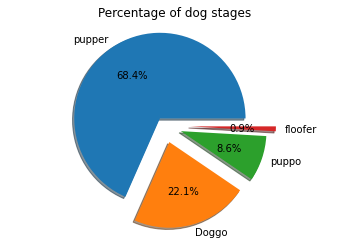

In [170]:
plt.pie(stage_df, 
        labels = ['pupper', 'Doggo', 'puppo', 'floofer'],
        autopct = '%1.1f%%', 
        shadow=True,
        explode=(0.1, 0.2, 0.2, 0.3)
       )
plt.title('Percentage of dog stages')
plt.axis('equal')

**Insights**

1. Pupper has the highest percentage
2. Floofer has the lowest percentage

**Relationship between retweet count and favorite count**

Text(0, 0.5, 'Favorite Count')

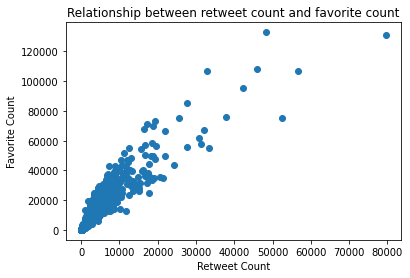

In [171]:
plt.scatter(clean_df.retweet_count, clean_df.favorite_count)
plt.title('Relationship between retweet count and favorite count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')

**Insights**

It appears that there is a linear relationship between both parameters

#                         Wrangle Report

The report that is decribing this data, describes the data wrangling process for this project.
The dataset that was wrangled, visualized and analysed was from a twitter dataset archive, WeRateDogs also knonw by their user name on twiiter as @dog_rates. where each dog is rated. WeRatedogs has over 9,3 million followers on twitter.These dog ratings gave denominators and numerators. of which the numerators are always greater than denominators.

The process of wrangling is divided into three steps, which are as follows:
1. Gathering
2. Assessing
3. Cleaning

# Act Report

The dataset that was wrangled in this project was from the twitter archive data. From the Twitter account WeRateDogs where dogs are rated with comments. The account has over 9,3 million followers. The handle of this account is @dog_rates. where each dog is rated. social media has given this page full recognition, regarding how each dog is rated.